Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans

Listando tickers

In [2]:
path_hist = 'C:\\Users\\victo\\OneDrive\\Documentos\\github\\tcc-analise-setores-mercado-financeiro\\data\\hist_cotacoes\\'
lista_tickers = os.listdir(path_hist)
lista_tickers = [ticker.replace("hist_", "").replace(".csv", "") for ticker in lista_tickers]
print(lista_tickers)

['AALR3', 'ABCB4', 'ABEV3', 'AERI3', 'AESB3', 'AFLT3', 'AGRO3', 'AGXY3', 'AHEB5', 'ALLD3', 'ALPA3', 'ALPK3', 'ALUP3', 'AMAR3', 'AMBP3', 'AMER3', 'ANIM3', 'APER3', 'ARML3', 'ARZZ3', 'ASAI3', 'ATMP3', 'ATOM3', 'AURE3', 'AVLL3', 'AZEV3', 'AZUL4', 'B3SA3', 'BAHI3', 'BALM3', 'BAUH4', 'BAZA3', 'BBAS3', 'BBDC3', 'BBSE3', 'BDLL3', 'BEEF3', 'BEES4', 'BGIP3', 'BIOM3', 'BLAU3', 'BMEB3', 'BMGB4', 'BMIN3', 'BMKS3', 'BMOB3', 'BNBR3', 'BOBR4', 'BPAC3', 'BPAN4', 'BRAP3', 'BRFS3', 'BRGE5', 'BRIT3', 'BRIV3', 'BRKM6', 'BRSR5', 'BSLI3', 'CALI3', 'CAMB3', 'CAML3', 'CASH3', 'CASN4', 'CBAV3', 'CBEE3', 'CCRO3', 'CEAB3', 'CEBR5', 'CEDO3', 'CEEB5', 'CEED4', 'CEGR3', 'CGAS3', 'CGRA3', 'CIEL3', 'CLSA3', 'CLSC3', 'CMIG3', 'CMIN3', 'COCE6', 'COGN3', 'CORR4', 'CPFE3', 'CPLE5', 'CRFB3', 'CRIV4', 'CRPG3', 'CSAB4', 'CSAN3', 'CSED3', 'CSMG3', 'CSNA3', 'CSRN6', 'CSUD3', 'CTKA3', 'CTNM3', 'CTSA4', 'CURY3', 'CVCB3', 'CXSE3', 'CYRE3', 'DASA3', 'DESK3', 'DEXP4', 'DIRR3', 'DMFN3', 'DMVF3', 'DOHL3', 'DOTZ3', 'DTCY3', 'DXCO3', 

Removendo histórico dos tickers inexistentes

In [3]:
lista_tickers_inexistentes = ["APTI4", "BPAR3", "MMAQ4", "MMAQ3"]
for ticker in lista_tickers:
    
    if ticker in lista_tickers_inexistentes:

        os.remove(path_hist + f"hist_{ticker}.csv")

In [4]:
#Verificando a remoção dos históricos dos tickers
lista_tickers_removidos = ["APTI4", "BPAR3", "MMAQ4", "MMAQ3"]
lista_hist_removidos = [f"hist_{x}.csv" for x in lista_tickers_removidos]
elementos_comuns = [elemento for elemento in lista_hist_removidos if elemento in os.listdir(path_hist)]

print(elementos_comuns)

[]


Gerando dataframe para armazenar os hitoricos de cotação de todos os tickers, com o calendário do período como índice

In [5]:
data_inicial = '2013-01-01'
data_final = '2023-10-01'
datas = pd.date_range(start=data_inicial, end=data_final, freq='D')
df_hist_cot = pd.DataFrame({'Date': datas}).set_index('Date')
# df_hist_cot

Adicionando os históricos de cotações ao dataframe

In [6]:
for ticker in lista_tickers:

    df_hist_cot_ticker = pd.read_csv(f"C:\\Users\\victo\\OneDrive\\Documentos\\github\\tcc-analise-setores-mercado-financeiro\\data\\hist_cotacoes\\hist_{ticker}.csv",
                            index_col="Date")
    df_hist_cot_ticker.index = pd.to_datetime(df_hist_cot_ticker.index)                    

    for data in df_hist_cot_ticker.index:
        df_hist_cot.loc[data, ticker] = df_hist_cot_ticker.loc[data, "Adj Close"]  

C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2905690563.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_hist_cot.loc[data, ticker] = df_hist_cot_ticker.loc[data, "Adj Close"]
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2905690563.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_hist_cot.loc[data, ticker] = df_hist_cot_ticker.loc[data, "Adj Close"]
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2905690563.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

In [7]:
df_hist_cot.head(10)
# df_hist_cot.tail(10)

,AALR3,ABCB4,ABEV3,AERI3,AESB3,AFLT3,AGRO3,AGXY3,AHEB5,ALLD3,...,VSTE3,VULC3,VVEO3,WEGE3,WEST3,WHRL3,WIZC3,WLMM3,YDUQ3,ZAMP3
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,5.524846,11.399803,NaN,NaN,1.654398,4.967494,NaN,25.592138,NaN,...,538.932434,3.980711,NaN,3.400867,NaN,1.397327,NaN,NaN,9.950507,NaN
2013-01-03,NaN,5.760800,11.601917,NaN,NaN,1.654398,4.967494,NaN,25.592138,NaN,...,532.820862,3.731917,NaN,3.553144,NaN,1.410551,NaN,NaN,9.816205,NaN
2013-01-04,NaN,5.679605,11.410657,NaN,NaN,1.654398,4.908415,NaN,25.592138,NaN,...,531.154053,3.625291,NaN,3.510844,NaN,1.410551,NaN,NaN,9.764928,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,5.724263,11.542235,NaN,NaN,1.654398,4.839490,NaN,25.592138,NaN,...,533.376404,3.518664,NaN,3.468546,NaN,1.406143,NaN,NaN,9.865043,NaN
2013-01-08,NaN,5.785158,11.528669,NaN,NaN,1.654398,4.824722,NaN,25.592138,NaN,...,533.376404,3.412038,NaN,3.329562,NaN,1.406143,NaN,NaN,10.104343,NaN
2013-01-09,NaN,5.724263,11.706367,NaN,NaN,1.654398,4.677025,NaN,25.592138,NaN,...,532.820862,3.412038,NaN,3.354941,NaN,1.366471,NaN,NaN,10.377829,NaN


Tratando datas com cotações inexistentes

In [8]:
def remover_datas_sem_cotacao(df_hist: pd.DataFrame) -> None:
    df_hist.dropna(inplace=True, how="all")

In [9]:
def tratar_datas_pre_ipo(df_hist: pd.DataFrame) -> None:
    for ticker in df_hist.columns:

        data_ipo = df_hist[ticker].first_valid_index()

        for data in df_hist.index:

            if data < data_ipo:

                df_hist.loc[data, ticker] = 0

In [10]:
def tratar_cotacoes_ausentes(df_hist: pd.DataFrame) -> None:
    for ticker in df_hist.columns:
        df_hist[f"{ticker}"].ffill(inplace=True)

In [11]:
def tratar_cotacoes_inconsistentes(df_hist: pd.DataFrame) -> None:
    # Identificando ticker com cotações negativa
    tickers_neg = []
    for ticker in df_hist.columns:

        for cotacao in df_hist.index:

            if df_hist[f"{ticker}"][cotacao] < 0:

                tickers_neg.append(ticker)
    tickers_neg =list(set(tickers_neg))

    # Removendo tickers com valores de cotação negativa
    for ticker in tickers_neg:
        df_hist.drop(f"{ticker}", axis=1, inplace= True)

In [12]:
def tratar_hist_cot(df_hist: pd.DataFrame) -> None:
    
    # Removendo datas sem cotação (finais de semana, feriados, ...)
    remover_datas_sem_cotacao(df_hist)

    # Preenchendo datas anteriores a cada IPO com o valor de cotação 0
    tratar_datas_pre_ipo(df_hist)

    # Preenchendo cotações ausentes com o último valor válido
    tratar_cotacoes_ausentes(df_hist)

    # Removendo tickers com valores de cotação negativa
    tratar_cotacoes_inconsistentes(df_hist)

In [13]:
tratar_hist_cot(df_hist_cot)
display(df_hist_cot)

,AALR3,ABCB4,ABEV3,AERI3,AESB3,AFLT3,AGRO3,AGXY3,AHEB5,ALLD3,...,VSTE3,VULC3,VVEO3,WEGE3,WEST3,WHRL3,WIZC3,WLMM3,YDUQ3,ZAMP3
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.00,5.524846,11.399803,0.00,0.00,1.654398,4.967494,0.00,25.592138,0.00,...,538.932434,3.980711,0.000000,3.400867,0.00,1.397327,0.00,0.000000,9.950507,0.00
2013-01-03,0.00,5.760800,11.601917,0.00,0.00,1.654398,4.967494,0.00,25.592138,0.00,...,532.820862,3.731917,0.000000,3.553144,0.00,1.410551,0.00,0.000000,9.816205,0.00
2013-01-04,0.00,5.679605,11.410657,0.00,0.00,1.654398,4.908415,0.00,25.592138,0.00,...,531.154053,3.625291,0.000000,3.510844,0.00,1.410551,0.00,0.000000,9.764928,0.00
2013-01-07,0.00,5.724263,11.542235,0.00,0.00,1.654398,4.839490,0.00,25.592138,0.00,...,533.376404,3.518664,0.000000,3.468546,0.00,1.406143,0.00,0.000000,9.865043,0.00
2013-01-08,0.00,5.785158,11.528669,0.00,0.00,1.654398,4.824722,0.00,25.592138,0.00,...,533.376404,3.412038,0.000000,3.329562,0.00,1.406143,0.00,0.000000,10.104343,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,8.65,19.770000,13.220000,0.85,11.22,8.150000,25.189463,4.57,16.590000,6.36,...,15.200000,19.443871,17.400000,36.130001,1.33,4.430000,5.14,26.783649,19.040001,6.25
2023-09-26,8.50,19.530001,13.040000,0.81,11.28,8.150000,24.599714,4.51,16.590000,6.24,...,14.950000,18.977217,16.850000,36.080002,1.31,4.220000,5.14,26.783649,19.000000,6.24
2023-09-27,8.46,19.370001,12.970000,0.84,10.95,8.100000,24.858845,4.15,16.590000,6.06,...,15.250000,19.084158,16.750000,36.020000,1.37,4.380000,5.09,26.783649,18.870001,6.10


Covertendo valores de cotação para percentuais do valor de IPO

In [14]:
for ticker in df_hist_cot.columns:

    # Filtrar o DataFrame para excluir as linhas com valor zero
    df_filtrado = df_hist_cot[df_hist_cot[f"{ticker}"] != 0]
    # Encontrar o índice do valor mínimo da coluna de datas
    dia_ipo = df_filtrado.index.min()
    # Acessar o valor da coluna de datas correspondente ao índice mínimo
    valor_ipo = df_filtrado.loc[dia_ipo, f"{ticker}"]

    df_hist_cot[f"{ticker}"] = df_hist_cot[f"{ticker}"] / valor_ipo

Decompondo as séries temporais de cotação

In [15]:
????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

Object `????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

In [16]:
df_hist_cot[df_hist_cot["AALR3"] != 0].index.min()

Timestamp('2016-10-28 00:00:00')

C:\Users\victo\AppData\Local\Temp\ipykernel_2476\3478915999.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tend[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\3478915999.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tend[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\3478915999.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

<Axes: xlabel='Date'>

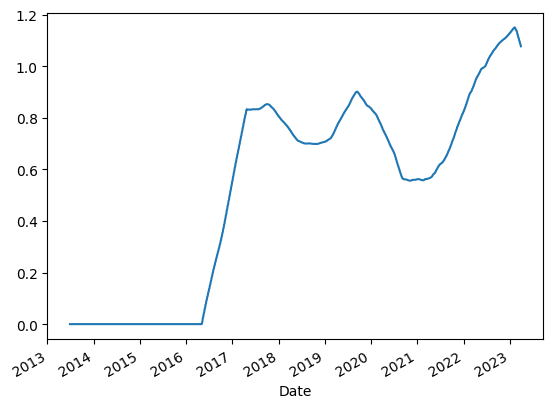

In [17]:
# Criando o dataframe do histórico de tendências
df_tend = pd.DataFrame(index = df_hist_cot.index)

for ticker in df_hist_cot.columns:

    # 22 dias de cotação por mês / 252 dias de cotação por ano / df_media_segm.shape[0]//2 maior período possível para decomposição da base de dados
    
    df_tend[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
                                                period = 252,
                                                model = "additive").trend

    # df_tend[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"].loc[df_hist_cot[f"{ticker}"] != 0],
    #                                             period = 22,
    #                                             model = "additive").trend

df_tend.dropna(inplace=True)
# df_tend
df_tend["AALR3"].plot()

C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2590545406.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_saz[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2590545406.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_saz[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2590545406.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

<Axes: xlabel='Date'>

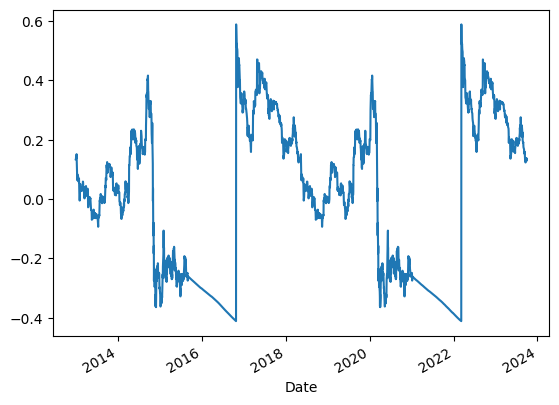

In [18]:
# Criando o dataframe de sazonalidades
df_saz = pd.DataFrame(index = df_hist_cot.index)

for ticker in df_hist_cot.columns:

    # 22 dias de cotação por mês / 252 dias de cotação por ano / df_hist_cot.shape[0]//2 maior período possível para decomposição da base de dados
    
    df_saz[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
                                                period = df_hist_cot[f"{ticker}"].shape[0]//2,
                                                model = "additive").seasonal
    
    # Remover os valores zerados anteriores ao IPO 
    # df_saz[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"].loc[df_hist_cot[f"{ticker}"] != 0],
    #                                             period = 22, #df_hist_cot[f"{ticker}"].loc[df_hist_cot[f"{ticker}"] != 0].shape[0]//2
    #                                             model = "additive").seasonal

df_saz.dropna(inplace=True)

# df_saz
df_saz["AALR3"].plot()

C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2896631852.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resid[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2896631852.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resid[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
C:\Users\victo\AppData\Local\Temp\ipykernel_2476\2896631852.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

<Axes: xlabel='Date'>

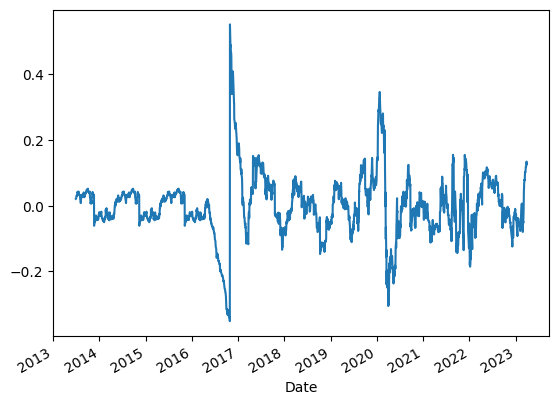

In [19]:
# Criando o dataframe do histórico de residuos
df_resid = pd.DataFrame(index = df_hist_cot.index)

for ticker in df_hist_cot.columns:

    # 22 dias de cotação por mês / 252 dias de cotação por ano / df_media_segm.shape[0]//2 maior período possível para decomposição da base de dados
    
    df_resid[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"],
                                                period = 252,
                                                model = "additive").resid
    
    # Remover os valores zerados anteriores ao IPO 
    # df_saz[f"{ticker}"] = seasonal_decompose(df_hist_cot[f"{ticker}"].loc[df_hist_cot[f"{ticker}"] != 0],
    #                                             period = 22, #df_hist_cot[f"{ticker}"].loc[df_hist_cot[f"{ticker}"] != 0].shape[0]//2
    #                                             model = "additive").seasonal

df_tend.dropna(inplace=True)
# df_resid
df_resid["AALR3"].plot()

Correlacionando as sazonalidades de cada ativo

In [20]:
mtx_corr_saz = df_hist_cot.corr()
mtx_corr_saz

,AALR3,ABCB4,ABEV3,AERI3,AESB3,AFLT3,AGRO3,AGXY3,AHEB5,ALLD3,...,VSTE3,VULC3,VVEO3,WEGE3,WEST3,WHRL3,WIZC3,WLMM3,YDUQ3,ZAMP3
AALR3,1.000000,0.906678,0.461533,0.229334,0.472648,0.745470,0.688464,0.517427,0.345994,0.332845,...,-0.658521,0.780838,0.519912,0.592923,0.190626,0.619964,0.643689,0.622556,0.377352,0.541187
ABCB4,0.906678,1.000000,0.437669,0.349107,0.592288,0.816150,0.814179,0.573648,0.176657,0.439426,...,-0.722575,0.881553,0.607836,0.717858,0.321484,0.720019,0.609024,0.728167,0.422113,0.596195
ABEV3,0.461533,0.437669,1.000000,0.093554,0.105103,0.209066,0.136385,0.030831,0.518958,0.133486,...,-0.239238,0.348878,0.049167,0.055502,0.111986,0.156881,0.594484,0.162138,0.307327,0.413077
AERI3,0.229334,0.349107,0.093554,1.000000,0.637826,0.525452,0.624908,0.436948,-0.274568,0.729588,...,-0.538551,0.350715,0.399535,0.689514,0.815250,0.665890,0.312844,0.742067,0.254417,0.152294
AESB3,0.472648,0.592288,0.105103,0.637826,1.000000,0.611816,0.853000,0.829275,-0.327492,0.881047,...,-0.642381,0.702970,0.842175,0.774867,0.694136,0.589279,0.310539,0.855117,-0.043925,0.057540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHRL3,0.619964,0.720019,0.156881,0.665890,0.589279,0.897818,0.809300,0.485042,-0.179002,0.578102,...,-0.784069,0.630517,0.473695,0.861622,0.560098,1.000000,0.518707,0.857302,0.631574,0.551676
WIZC3,0.643689,0.609024,0.594484,0.312844,0.310539,0.527218,0.456907,0.201306,0.275364,0.389922,...,-0.640414,0.416972,0.195903,0.416888,0.325303,0.518707,1.000000,0.480732,0.407992,0.367087
WLMM3,0.622556,0.728167,0.162138,0.742067,0.855117,0.825450,0.925054,0.780492,-0.235728,0.822873,...,-0.788670,0.754701,0.757344,0.902230,0.659669,0.857302,0.480732,1.000000,0.293134,0.309863
YDUQ3,0.377352,0.422113,0.307327,0.254417,-0.043925,0.529671,0.188140,-0.195587,0.171858,0.077130,...,-0.270451,0.251027,-0.181476,0.253075,0.194724,0.631574,0.407992,0.293134,1.000000,0.719960


Gerando o modelo de clusterização de ativos baseado na correlação entre a sazonalidade de seus históricos de cotação

In [21]:
def gerar_modelo_kmeans(numero_clusters:int, df = mtx_corr_saz) -> dict:
    
    # instanciando um modelo de clusterização KMeans
    KMeans_model = KMeans(n_clusters=numero_clusters, max_iter=10_000, n_init=100, random_state=61658)
    # Aplicando modelo aos dados e obtendo os clusters atribuidos a cada segmento
    list_clusters = KMeans_model.fit_predict(df)
    # Acessando os centroides dos Clusters
    centroids = KMeans_model.cluster_centers_
    
    return {"modelo" : KMeans_model,
            "lista clusters" : list_clusters,
            "centroides" : centroids}

In [22]:
mtx_corr_saz_clus = mtx_corr_saz
mtx_corr_saz_clus["clusters"] = gerar_modelo_kmeans(14, mtx_corr_saz)["lista clusters"]
mtx_corr_saz_clus

c:\Users\victo\OneDrive\Documentos\github\tcc-analise-setores-mercado-financeiro\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\victo\OneDrive\Documentos\github\tcc-analise-setores-mercado-financeiro\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


,AALR3,ABCB4,ABEV3,AERI3,AESB3,AFLT3,AGRO3,AGXY3,AHEB5,ALLD3,...,VULC3,VVEO3,WEGE3,WEST3,WHRL3,WIZC3,WLMM3,YDUQ3,ZAMP3,clusters
AALR3,1.000000,0.906678,0.461533,0.229334,0.472648,0.745470,0.688464,0.517427,0.345994,0.332845,...,0.780838,0.519912,0.592923,0.190626,0.619964,0.643689,0.622556,0.377352,0.541187,5
ABCB4,0.906678,1.000000,0.437669,0.349107,0.592288,0.816150,0.814179,0.573648,0.176657,0.439426,...,0.881553,0.607836,0.717858,0.321484,0.720019,0.609024,0.728167,0.422113,0.596195,5
ABEV3,0.461533,0.437669,1.000000,0.093554,0.105103,0.209066,0.136385,0.030831,0.518958,0.133486,...,0.348878,0.049167,0.055502,0.111986,0.156881,0.594484,0.162138,0.307327,0.413077,2
AERI3,0.229334,0.349107,0.093554,1.000000,0.637826,0.525452,0.624908,0.436948,-0.274568,0.729588,...,0.350715,0.399535,0.689514,0.815250,0.665890,0.312844,0.742067,0.254417,0.152294,8
AESB3,0.472648,0.592288,0.105103,0.637826,1.000000,0.611816,0.853000,0.829275,-0.327492,0.881047,...,0.702970,0.842175,0.774867,0.694136,0.589279,0.310539,0.855117,-0.043925,0.057540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WHRL3,0.619964,0.720019,0.156881,0.665890,0.589279,0.897818,0.809300,0.485042,-0.179002,0.578102,...,0.630517,0.473695,0.861622,0.560098,1.000000,0.518707,0.857302,0.631574,0.551676,5
WIZC3,0.643689,0.609024,0.594484,0.312844,0.310539,0.527218,0.456907,0.201306,0.275364,0.389922,...,0.416972,0.195903,0.416888,0.325303,0.518707,1.000000,0.480732,0.407992,0.367087,12
WLMM3,0.622556,0.728167,0.162138,0.742067,0.855117,0.825450,0.925054,0.780492,-0.235728,0.822873,...,0.754701,0.757344,0.902230,0.659669,0.857302,0.480732,1.000000,0.293134,0.309863,13
YDUQ3,0.377352,0.422113,0.307327,0.254417,-0.043925,0.529671,0.188140,-0.195587,0.171858,0.077130,...,0.251027,-0.181476,0.253075,0.194724,0.631574,0.407992,0.293134,1.000000,0.719960,6


In [23]:
def analisar_cluster(cluster:int, df_corr_clust:pd.DataFrame = mtx_corr_saz_clus) -> dict:
    
    #gerando df com os segmentos do cluster
    acoes_clus = df_corr_clust.loc[df_corr_clust["clusters"] == cluster]
    
    for ticker in acoes_clus.columns:
        if ticker in acoes_clus.index:
            continue
        else:
            del acoes_clus[ticker]
    
    # print(f"Número de segmentos no cluster: {segm_clus.shape[0]}")

    # Verificando a presença de correlações negativas entre segmentos do cluster.
    corr_neg_clus = False
    for ticker in acoes_clus.index:
        for ticker_ in acoes_clus.columns:
            if acoes_clus.loc[ticker, ticker_] < 0:
                corr_neg_clus = True

    # if corr_neg_clus == True:
    #     print("Há correlações negativas entre segmentos do cluster.")
    # else:
    #     print("Não há correlações negativas entre segmentos do cluster.")
    
    return {"df_clus": acoes_clus,
            "corr_neg_clus": corr_neg_clus,
            "num_segm_clus": acoes_clus.shape[0]}

In [24]:
for numero_clusters in range(2,40):
    
    kmeans_model = gerar_modelo_kmeans(numero_clusters)["modelo"]
    df_corr_clust = pd.DataFrame(mtx_corr_saz)
    df_corr_clust["clusters"] = gerar_modelo_kmeans(numero_clusters)["lista clusters"]

    
    corr_neg_model = False
    for cluster in range(0,numero_clusters):
        if analisar_cluster(df_corr_clust=df_corr_clust, cluster=cluster)["corr_neg_clus"] == True:
            corr_neg_model = True
            break
    
    if corr_neg_model == False:
        print(f"Nenhum cluster do modelo Kmeans gerado \ncom {numero_clusters} clusters apresenta correlação negativa \nentre os segmentos que o compõem.")
        numero_clusters_ideal = numero_clusters
        break

Nenhum cluster do modelo Kmeans gerado 
com 35 clusters apresenta correlação negativa 
entre os segmentos que o compõem.


In [25]:
for cluster in range(0,35):
    num_segm_clus = df_corr_clust.loc[df_corr_clust["clusters"] == cluster].shape[0]
    print(f"Cluster {cluster} possui {num_segm_clus} ações.")

Cluster 0 possui 3 ações.
Cluster 1 possui 24 ações.
Cluster 2 possui 8 ações.
Cluster 3 possui 16 ações.
Cluster 4 possui 8 ações.
Cluster 5 possui 24 ações.
Cluster 6 possui 4 ações.
Cluster 7 possui 17 ações.
Cluster 8 possui 2 ações.
Cluster 9 possui 5 ações.
Cluster 10 possui 13 ações.
Cluster 11 possui 9 ações.
Cluster 12 possui 34 ações.
Cluster 13 possui 7 ações.
Cluster 14 possui 2 ações.
Cluster 15 possui 6 ações.
Cluster 16 possui 5 ações.
Cluster 17 possui 24 ações.
Cluster 18 possui 7 ações.
Cluster 19 possui 2 ações.
Cluster 20 possui 11 ações.
Cluster 21 possui 10 ações.
Cluster 22 possui 4 ações.
Cluster 23 possui 2 ações.
Cluster 24 possui 17 ações.
Cluster 25 possui 5 ações.
Cluster 26 possui 13 ações.
Cluster 27 possui 7 ações.
Cluster 28 possui 4 ações.
Cluster 29 possui 10 ações.
Cluster 30 possui 11 ações.
Cluster 31 possui 8 ações.
Cluster 32 possui 8 ações.
Cluster 33 possui 4 ações.
Cluster 34 possui 4 ações.


In [26]:
# # Plotando o heatmap da matriz de correlação do cluster
# cluster = 7
# # for cluster in range(0, numero_clusters):
# df_cluster = df_corr_clust.loc[df_corr_clust["clusters"] == cluster]
# 
# for coluna in df_cluster.columns:
    # if coluna in df_cluster.index:
        # pass
    # else:
        # df_cluster = df_cluster.drop(columns=[coluna])
# 
# display(df_cluster)
# sns.heatmap(df_cluster, annot=True, cmap='coolwarm')
# plt.title(f"Cluster {cluster}")

Agrupando ações por clusters para buscar correlações negativas entre as sazonalidades dos clusters

In [27]:
data_inicial = '2013-01-01'
data_final = '2023-10-01'
datas = pd.date_range(start=data_inicial, end=data_final, freq='D')
df_media_clus = pd.DataFrame({'Date': datas}).set_index('Date')

for cluster in range(0,35):
    
    # Gerando lista de tickers do cluster
    lista_tickers_clus = df_corr_clust.loc[df_corr_clust["clusters"] == cluster].index

    # Criando um dataframe com todas as datas como um índice
    data_inicial = '2013-01-01'
    data_final = '2023-10-01'
    datas = pd.date_range(start=data_inicial, end=data_final, freq='D')
    df_cluster = pd.DataFrame({'Date': datas}).set_index('Date')

    # Criando um dataframe com os históricos de cotação dos tickers do cluster
    for ticker in lista_tickers_clus:

        df_hist_cot_ticker = pd.read_csv(
            f"C:\\Users\\victo\\OneDrive\\Documentos\\github\\tcc-analise-setores-mercado-financeiro\\data\\hist_cot_norm\\hist_{ticker}.csv",
            index_col="Date")
        
        for data in df_hist_cot_ticker.index:
            df_cluster.loc[data, ticker] = df_hist_cot_ticker.loc[data, "Adj Close"]
    
    tratar_hist_cot(df_cluster)

    # Gerando o histórico da média de cotações de cada cluster
    for data in df_cluster.index:
        
        soma_linha = 0
        cont_tickers_somados = 0
        
        for ticker in df_cluster.columns:
            
            cond_calc_media = df_cluster.loc[data, ticker] !=0 and not np.isnan(df_cluster.loc[data, ticker])
            if cond_calc_media:
                
                soma_linha += df_cluster.loc[data, ticker]
                cont_tickers_somados += 1
        
        if cont_tickers_somados > 0:
            df_cluster.loc[data, "media"] = soma_linha / cont_tickers_somados 
    
    # Adicinando o histórico da média de cotações de cada cluster ao dataframe
    for data in df_cluster.index:
        df_media_clus.loc[data, cluster] = df_cluster.loc[data, "media"]

# Removendo datas sem cotação (finais de semana, feriados, ...)
remover_datas_sem_cotacao(df_media_clus)
tratar_datas_pre_ipo(df_media_clus)
for cluster in df_media_clus.columns:
    df_media_clus[cluster].ffill(inplace=True)

In [28]:
# Criando o dataframe de sazonalidades dos clusters
df_saz_media_clus = pd.DataFrame(index = df_media_clus.index)

for cluster in df_media_clus.columns:

    # 22 dias de cotação por mês / 252 dias de cotação por ano / df_hist_cot.shape[0]//2 maior período possível para decomposição da base de dados
    
    df_saz_media_clus[cluster] = seasonal_decompose(df_media_clus[cluster],
                                                period = 252,
                                                model = "additive").seasonal

df_saz_media_clus.dropna(inplace=True)
# df_saz_clus.head()
# df_saz_clus[0].plot()

Analisando a Correlação entre os clusters

In [29]:
mtx_corr_entre_saz_clusters = df_saz_media_clus.corr()

# # Visualizando o heatmap das correlações entre os clusters
# fig, ax = plt.subplots(figsize=(25, 10))
# sns.heatmap(mtx_corr_entre_clusters, ax=ax, annot=True, cmap='coolwarm')
# plt.show()

In [30]:
mtx_corr_entre_saz_clusters.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.000000,0.072253,-0.457106,0.405588,0.268366,0.567110,-0.561386,0.390150,0.164721,0.094110,...,0.083654,-0.414837,0.134863,-0.026887,-0.545696,0.264047,0.725624,0.389142,-0.292527,-0.039004
1,0.072253,1.000000,0.501506,0.649528,0.512199,0.476860,0.482404,-0.184579,0.724976,0.809227,...,0.058547,0.179992,0.698674,0.399350,0.424063,0.787104,0.021423,0.114143,0.758315,0.077764
2,-0.457106,0.501506,1.000000,0.432794,0.523203,0.193274,0.805084,-0.142654,0.440541,0.601504,...,0.053494,0.654119,0.606972,0.218775,0.427520,0.526812,-0.266854,-0.026380,0.600233,0.343745
3,0.405588,0.649528,0.432794,1.000000,0.728232,0.814892,0.370140,0.281866,0.675483,0.744713,...,0.236658,0.386322,0.832805,0.257586,-0.008710,0.838132,0.519736,0.333699,0.388675,0.306138
4,0.268366,0.512199,0.523203,0.728232,1.000000,0.772381,0.393861,0.211278,0.390709,0.634131,...,0.249874,0.276709,0.720806,0.033249,-0.035845,0.784530,0.223197,0.439854,0.219357,0.479383


Identificando os pares de clusters com maior correlação negativa

In [33]:
# count_clus_corr_neg = 0
# for cluster in mtx_corr_entre_saz_clusters.columns:
    
#     clus_ref = cluster
#     clus_corr_neg = mtx_corr_entre_saz_clusters[cluster].idxmin()
#     val_corr_neg = mtx_corr_entre_saz_clusters[cluster].sort_values(ascending=True).iloc[0]
    
#     if val_corr_neg < -0.5:
#         count_clus_corr_neg += 1
#         print(f"Cluster analisado = {clus_ref}\nCluster com maior correlação negativa = {clus_corr_neg}\nCorrelação = {val_corr_neg}\n")

# print(f"Número de pares de clusters com correlação negativa superior a 80%: {count_clus_corr_neg//2}")

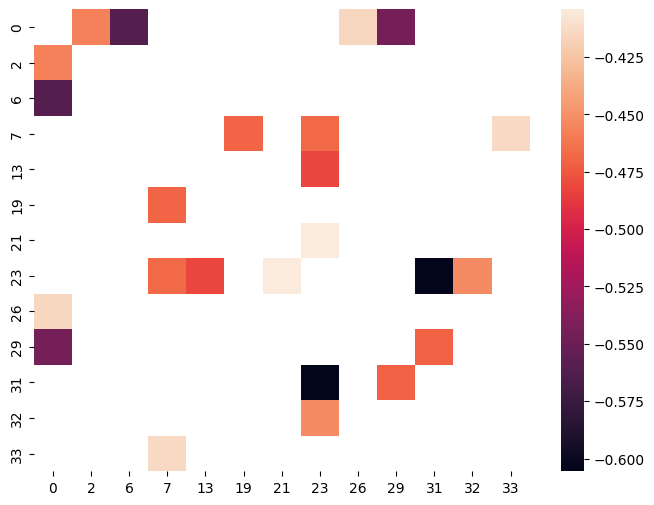

In [40]:
high_neg_corr = mtx_corr_entre_saz_clusters[mtx_corr_entre_saz_clusters <= -0.4].dropna(how="all", axis=0).dropna(how="all", axis=1)

# display(filtered_matrix)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(high_neg_corr, ax=ax, annot=False, cbar=True)
# sns.heatmap(high_neg_corr, ax=ax, annot=True, cbar=False)
plt.show()